## Population and Sampling Analysis for Women's National Basketball Association

##### The current dataset analysis is an attempt to understand the difference between sampling and population analysis. 

The goal of the project is assort the data in accordance with dataquest questionairre and proceed with the analysis likewise.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wnba = pd.read_csv("wnba.csv")

In [3]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [4]:
wnba.tail()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
138,Tiffany Hayes,ATL,G,178,70.0,22.093170,US,"September 20, 1989",27,Connecticut,...,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84.0,23.025685,US,"April 26, 1985",32,Texas,...,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69.0,22.530612,US,"September 23, 1984",32,South Carolina,...,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84.0,22.550941,US,"May 12, 1988",29,Connecticut,...,56,212,268,75,21,22,71,582,11,0
142,Yvonne Turner,PHO,G,175,59.0,19.265306,US,"October 13, 1987",29,Nebraska,...,11,13,24,30,18,1,32,151,0,0


In [5]:
wnba.shape

(143, 32)

Let's now look at the assignments of both population and samples to allow clearer understanding of the play here.

In [6]:
#parameter is asserted for a population analysis
parameter = wnba["Games Played"].max()

In [7]:
parameter

32

In [8]:
#samples are used for a specific subset of the dataset to assess the whole of the population
sample = wnba["Games Played"].sample(30, random_state = 1)

In [9]:
sample

78     30
116    29
31     26
5      14
125    28
45     20
14      4
44     28
73     14
89     20
130    25
53     20
85     30
93     27
29     29
16     20
35      7
90      9
83     29
19     29
40     30
92     30
122    29
98     30
59     29
42     28
33     30
99     24
69     29
97     21
Name: Games Played, dtype: int64

As of the now, the information is not intuitive to differentiate between the sample and the parameter.

###### Hence, a question needs to be raised, is there an existence of a sampling error, which is the erroneous difference between the measures of the whole dataset and the subset of the data sampled.

In [10]:
#Asserting the maximum Games Played in the parameter and the sample helps to understand the possible sampling
#error caused.
statistic = sample.max()

In [11]:
statistic

30

There you go!

In [12]:
sampling_error = parameter - statistic

In [13]:
sampling_error

2

The sampling error of 2 shows that our samples are not as representative as the parameters of the entire population.

##### Hence to make our samples more representative, we'll have to use an appropriate method to sample our data to cover the population metrics as closely as possible.

_Therefore, we'll use the Simple Random Sampling Method for such an attempt._

We will use the points scored in the forthcoming attempt.

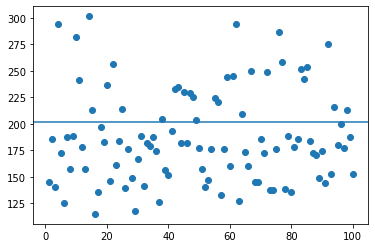

In [14]:
#Trial to make 100 samples of 10 values repetitively to allow comparison with the parameter average likewise.
sample_means = []
population_mean = wnba['PTS'].mean()

for i in range(100):
    sample = wnba['PTS'].sample(10, random_state=i)
    sample_means.append(sample.mean())

plt.scatter(range(1,101), sample_means)#displaying all the sample means as points between 1-100 on the x-axis.
plt.axhline(population_mean)#the mean of the population as the centrally passing line to establish comparisons.

In [15]:
#as visible, the max points in the sample is in the range of 0-20.
max_of_samples = max(sample_means)
max_of_samples

301.4

In [16]:
min_of_samples = min(sample_means)
min_of_samples

115.0

In [17]:
population_mean

201.7902097902098

As observable, the population mean is 201.7, whereas the sample means is distributed in the range of 115 - 301.4.

This distribution and large variation in the sample means shows that the sample data is not yet representative of the population data.

_Therefore, to solve this problem, the size of the sample can be varied, to better close in on the population data representation probability._

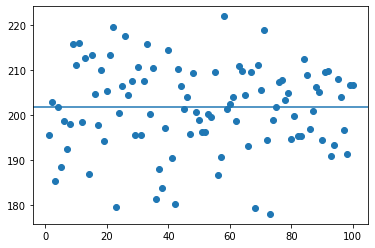

In [18]:
sample_means_100 = []
for i in range(100):
    sample_100 = wnba['PTS'].sample(100, random_state=i)
    sample_means_100.append(sample_100.mean())

plt.scatter(range(1,101), sample_means_100)#displaying all the sample means as points between 1-100 on the x-axis.
plt.axhline(population_mean)

In [19]:
max_of_samples_100 = max(sample_means_100)
max_of_samples_100

222.05

In [20]:
min_of_samples_100 = min(sample_means_100)
min_of_samples_100

178.12

There we go!

As evident, increasing the sample size increases the representative condition of the sample data average considerably.

_This establishes two facts about Simple Random Sampling:_

_1. It is not practical to use SRS for small amounts of sampling data._

_2. A large dataset reduces the variability in the sample dataset and allows it to stay representative accordingly._

#### But there is a problem with the use of SRS that even the choice of increased sample size cannot tackle!

The desired category of data can go unseen with such an approach and the visuals alongside will not do justice to needs of the analysis.

_Therefore, we need to use a better method, something like the Stratified sampling technique to tackle data in accordance with the respective categories._

In [28]:
#Creating stratums for the context of points scored per game and player positions.
wnba["avg_pts_per_game"] = wnba["PTS"] / wnba["Games Played"]

In [29]:
wnba["avg_pts_per_game"]

0      11.625000
1       7.233333
2       8.384615
3       6.064516
4       2.083333
         ...    
138    16.103448
139     1.272727
140    10.259259
141    20.068966
142     5.033333
Name: avg_pts_per_game, Length: 143, dtype: float64

In [30]:
wnba["Pos"].value_counts()

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64

In [31]:
#Stratum for positions
pos_G = wnba[wnba.Pos == "G"]
pos_F = wnba[wnba.Pos == "F"]
pos_C = wnba[wnba.Pos == "C"]
pos_GNF = wnba[wnba.Pos == "G/F"]
pos_FNC = wnba[wnba.Pos == "F/C"]

In [32]:
#Assigning the points relative to the respective position in a dictionary format for ease of assorting.
pts_per_pos = {}
for stra, pos in [(pos_G, "G"),(pos_F, "F"),(pos_C, "C"),(pos_GNF, "G/F"),(pos_FNC, "F/C")]:
    sample = stra["avg_pts_per_game"].sample(10,random_state = 0) #SRS to allot the points per game 
    pts_per_pos[pos] = sample.mean()
pos_most_pts = max(pts_per_pos, key = pts_per_pos.get)

In [33]:
pos_most_pts

'C'

In [34]:
pts_per_pos

{'G': 7.092926195632343,
 'F': 8.702175158545568,
 'C': 9.833761394334251,
 'G/F': 6.817264935760487,
 'F/C': 9.059118773946361}

There!


Here it is evident that the data is processed through sampling with a small sample size but which size is actually potent enough to affect and produce results of different desired categories more conveniently, using __Stratum Sampling__.

_But_ this result can be bettered with Proportional Stratified Sampling.


To perform Proportional Stratified Sampling appropriately, we must divide the data into specific categories to realize the division better.

In [46]:
# Dividing by the number of games played
games_under_12 = wnba[wnba["Games Played"] <= 12]
games_12_22 = wnba[(wnba["Games Played"] > 12) & (wnba["Games Played"]) <= 22]
games_above_22 = wnba[wnba["Games Played"] > 22]

proportional_sampling_mean = []
#games_12_22["Games Played"].value_counts()
#games_12_22["Games Played"].value_counts()
for i in range(100):
    sample_u_12 = games_under_12["PTS"].sample(1, random_state = i)#1 in the sample method defines the
                                                        #percentage proportion of the quantity from the population.
    sample_12_22 = games_12_22["PTS"].sample(2, random_state = i)
    sample_a_22 = games_above_22["PTS"].sample(7, random_state = i)
    final_pts_sample = pd.concat([sample_u_12, sample_12_22, sample_a_22])
    proportional_sampling_mean.append(final_pts_sample.mean())

In [47]:
sample_u_12

0    93
Name: PTS, dtype: int64

In [48]:
final_pts_sample

0       93
64      12
8      395
76     411
60     200
27     228
58     364
107     96
10     244
135    217
Name: PTS, dtype: int64

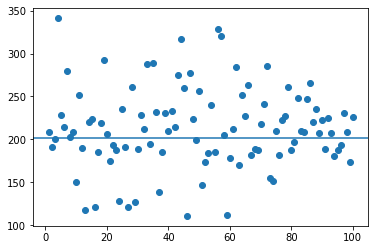

In [51]:
plt.scatter(range(1,101), proportional_sampling_mean)
plt.axhline(wnba["PTS"].mean())

_Proportional Stratified Sampling seems to be adverse in terms of variability, as compared to the SRS._

The fault actually is in the selection of the strata data.

The number of games played is not a well defined condition.

We need a more concrete data subset to allocate the points and that shall help in the definition of the proper sampling result.

__Avoidance of great variability in the target parameter of the results, "PTS" in this case is a hindrance.__

__Hence we need to assert the correlation of the different columns of the dataset to understand their correlation with the 'PTS' column.__

<sup>_Maximizing the stratification is another essential part of the overall feasibility of the stratification process._

In [53]:
#Applying the spearman correlation to improvise on the pearson correlation and understand the property of measure, 
#'PTS' in this case.
# Since focus is on the number of games played, let's compare games played with the amount of game playing done i.e
# minutes of game played.
wnba["MIN"].corr(wnba["PTS"], method = "spearman")

0.9517818137147449

In [54]:
wnba["Games Played"].corr(wnba["PTS"], method = 'spearman')

0.6496056534708409

As evident, the spearman correlation, which basically exaggerates the improvement of the pearson correlation method, on application of the Minutes column namely "MIN" and the games played column "Games Played" shows a great difference.


__Additionally, this confirms the choice of Minutes played as a strong correlative measure to utilize for Proportional Stratification Sampling.__

In [56]:
#Let's start by dividing our minutes column into bins
wnba["MIN"].value_counts(bins = 3, normalize = True)

(347.333, 682.667]    0.349650
(10.993, 347.333]     0.335664
(682.667, 1018.0]     0.314685
Name: MIN, dtype: float64

In [57]:
#Therefore, similar to the previous setup, we have three possible bins to work with.
minutes_10_348 = wnba[(wnba["MIN"] > 10) & (wnba["MIN"] < 348)]
minutes_348_683 = wnba[(wnba["MIN"] > 348) & (wnba["MIN"] <= 683)]
minutes_683_1018 = wnba[(wnba["MIN"] > 683) & (wnba["MIN"] <= 1018)]

In [58]:
minutes_10_348

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3,avg_pts_per_game
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,22,28,12,3,6,12,93,0,0,11.625000
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,9,12,12,7,0,14,50,0,0,2.083333
5,Alexis Peterson,SEA,G,170,63.0,21.799308,US,"June 20, 1995",22,Syracuse,...,13,16,11,5,0,11,26,0,0,1.857143
6,Alexis Prince,PHO,G,188,81.0,22.917610,US,"February 5, 1994",23,Baylor,...,14,15,5,4,3,3,24,0,0,1.500000
9,Allison Hightower,WAS,G,178,77.0,24.302487,US,"June 4, 1988",29,LSU,...,7,10,10,5,0,2,36,0,0,5.142857
12,Amanda Zahui B.,NY,C,196,113.0,29.414827,SE,"August 9, 1993",24,Minnesota,...,18,23,7,4,5,12,51,0,0,2.040000
13,Amber Harris,CHI,F,196,88.0,22.907122,US,"January 16, 1988",29,Xavier,...,28,40,5,3,9,6,41,0,0,1.863636
14,Aneika Henry,ATL,F/C,193,87.0,23.356332,JM,"February 13, 1986",31,Florida,...,4,4,1,2,0,3,8,0,0,2.000000
15,Angel Robinson,PHO,F/C,198,88.0,22.446689,US,"August 30, 1995",21,Arizona State,...,42,58,8,1,11,16,58,0,0,3.866667
16,Asia Taylor,WAS,F,185,76.0,22.205990,US,"August 22, 1991",26,Louisville,...,21,37,9,5,2,10,31,0,0,1.550000


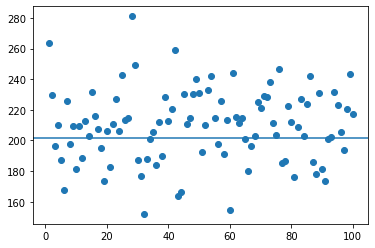

In [62]:
prop_sampling_mean_minutes = []
for i in range(100):
    sample_under_348 = minutes_10_348["PTS"].sample(3, random_state = i)
    sample_under_682 = minutes_348_683["PTS"].sample(3, random_state = i)
    sample_under_1018 = minutes_683_1018["PTS"].sample(3, random_state = i)
    fin_sample_minutes = pd.concat([sample_under_348, sample_under_682, sample_under_1018])
    prop_sampling_mean_minutes.append(fin_sample_minutes.mean())
plt.scatter(range(1, 101), prop_sampling_mean_minutes)
plt.axhline(wnba["PTS"].mean())

### As evident, Proportional Stratified Sampling functions better with the strongly correlated field of minutes played by the players of the Women's NBA teams.